# Preliminary Analysis
### Dataset: COVID Fake News Data.csv

In [6]:
# importing libraries

import pandas as pd
import nltk
import numpy as np 
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk import FreqDist

In [7]:
data = pd.read_csv("COVID Fake News Data.csv")
data.columns

Index(['headlines', 'outcome'], dtype='object')

<p> Two headers: headlines, outcome (binary classification, real (1) or fake (0) </p>

In [8]:
data.shape

(10201, 2)

<p> There are 10201 news headlines total in this dataset. </p>

In [9]:
fake = data[data["outcome"] == 0]
fake.shape

(9727, 2)

In [10]:
real = data[data["outcome"] == 1]
real.shape

(474, 2)

In [11]:
data["outcome"].value_counts(normalize=True)

0    0.953534
1    0.046466
Name: outcome, dtype: float64

<p> 95% of the headlines in this dataset are classified as fake. </p>


## Analysis

In [12]:
fake_text = fake["headlines"]
fake_text = [l for l in fake_text]
fake_text = " ".join(fake_text)

# tokenizing the text

tokens = word_tokenize(fake_text)
tokens[:5] # first five words

# removing stop words (?)

stop_words = set(stopwords.words("english"))

filtered = []

for word in tokens:
    if word.casefold() not in stop_words:
        filtered.append(word)

# remove punctuation >:(

punctuation = [".", ",", "(", ")", "?", "!", ":"]

filtered_no_punc = []

for word in filtered:
    if word not in punctuation:
        filtered_no_punc.append(word)

# frequency distribution

fakeText = Text(filtered_no_punc)

freq_dist = FreqDist(fakeText)

print(freq_dist)






<FreqDist with 15082 samples and 103235 outcomes>


In [13]:
# narrowing down 20 most common words

most_common_list = freq_dist.most_common(20)
most_common_words = [most_common_list[i][0] for i in range(len(most_common_list))]
most_common_words

['coronavirus',
 'COVID-19',
 '“',
 'people',
 '”',
 'shows',
 'video',
 '’',
 'China',
 'pandemic',
 'lockdown',
 'India',
 'Facebook',
 'new',
 'Video',
 'claims',
 'vaccine',
 'novel',
 'government',
 'infected']

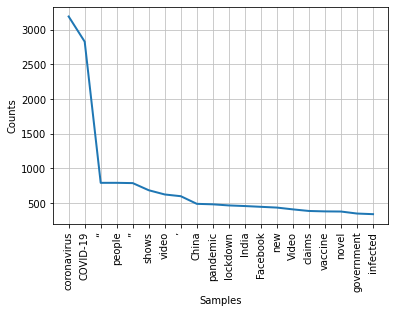

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
freq_dist.plot(20, cumulative=False)

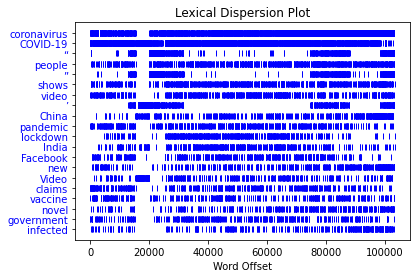

In [15]:
fakeText.dispersion_plot(most_common_words)

In [16]:
fakeText.collocations()

novel coronavirus; thousands times; Bill Gates; new coronavirus;
alongside claim; Facebook Twitter; Donald Trump; times multiple;
social media; United States; tested positive; Prime Minister; video
shows; social distancing; Video shows; face masks; multiple posts; Sri
Lanka; New York; SÃ£o Paulo
